### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import shap

### Importing the DataSet

In [2]:
data = pd.read_csv('Travel_Insurence_Prediction_.csv')

In [3]:
data

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [4]:
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
data.tail()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [7]:
data.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [8]:
data.shape

(1987, 10)

#### Corelation

In [9]:
numeric_df = data.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                 Unnamed: 0       Age  AnnualIncome  FamilyMembers  \
Unnamed: 0         1.000000 -0.004917     -0.025031      -0.041506   
Age               -0.004917  1.000000     -0.020101       0.027409   
AnnualIncome      -0.025031 -0.020101      1.000000      -0.015367   
FamilyMembers     -0.041506  0.027409     -0.015367       1.000000   
ChronicDiseases   -0.006858  0.007359     -0.001149       0.028209   
TravelInsurance    0.006196  0.061060      0.396763       0.079909   

                 ChronicDiseases  TravelInsurance  
Unnamed: 0             -0.006858         0.006196  
Age                     0.007359         0.061060  
AnnualIncome           -0.001149         0.396763  
FamilyMembers           0.028209         0.079909  
ChronicDiseases         1.000000         0.018190  
TravelInsurance         0.018190         1.000000  


<Axes: >

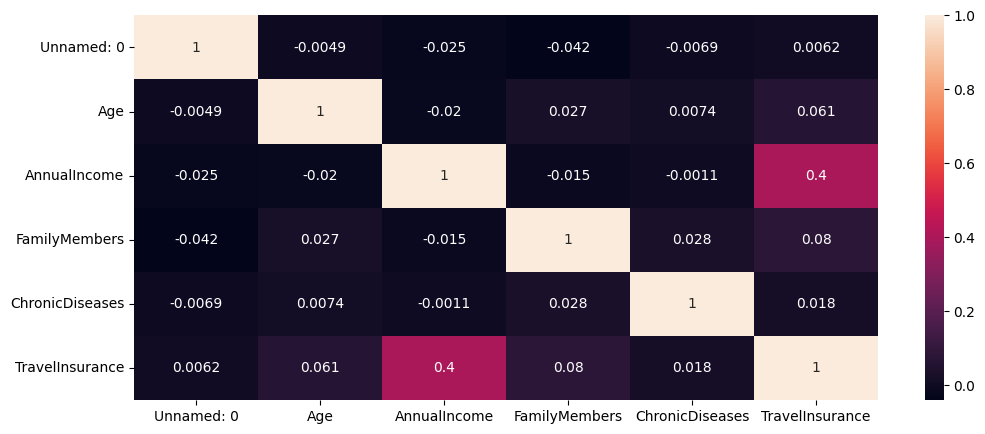

In [10]:
plt.subplots(figsize=(12,5))
sns.heatmap(correlation_matrix,annot=True)

In [11]:
data.drop(columns=["Unnamed: 0"], inplace=True)

### Checking and Handling Null Values

In [12]:
data.isnull().any()

Age                    False
Employment Type        False
GraduateOrNot          False
AnnualIncome           False
FamilyMembers          False
ChronicDiseases        False
FrequentFlyer          False
EverTravelledAbroad    False
TravelInsurance        False
dtype: bool

In [13]:
data.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

#### Since there are no null values present in the dataset, So we need not to handle the null values

### Data Visualization.

<Axes: xlabel='Employment Type', ylabel='count'>

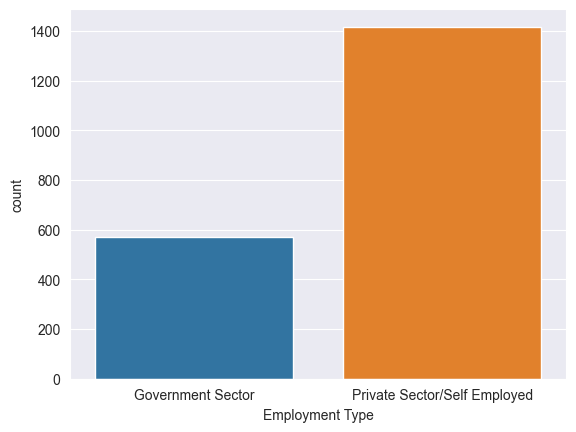

In [14]:
sns.set_style('darkgrid')
sns.countplot(x ='Employment Type', data = data)

#### From the above plot we can clearly observe that, the PrivateSector/Self Employed are having the higher Probability of taking the Insurence.

<Axes: xlabel='GraduateOrNot', ylabel='count'>

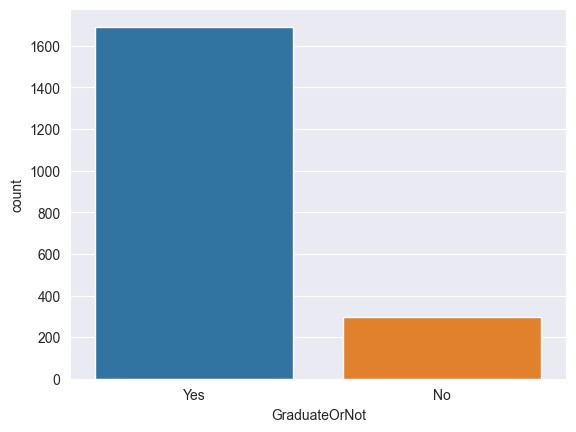

In [15]:
sns.set_style('darkgrid')
sns.countplot(x ='GraduateOrNot', data = data)

#### From the above plot we can clearly observe that, the Graduates are having the higher Probability of taking the Insurence.

<Axes: xlabel='FrequentFlyer', ylabel='count'>

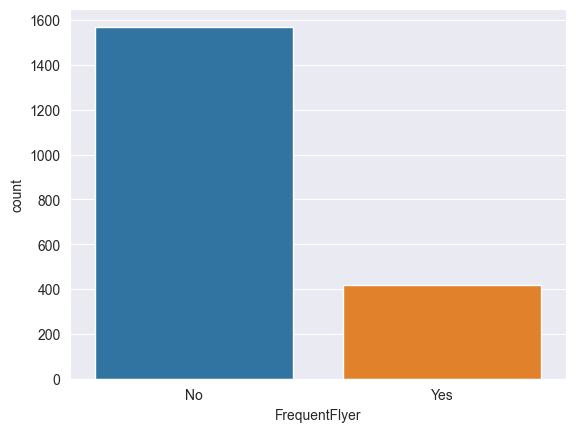

In [16]:
sns.set_style('darkgrid')
sns.countplot(x ='FrequentFlyer', data = data)

#### From the above plot we can clearly observe that, the Non-FrequentFlyers are having the higher Probability of taking the Insurence.

<Axes: xlabel='EverTravelledAbroad', ylabel='count'>

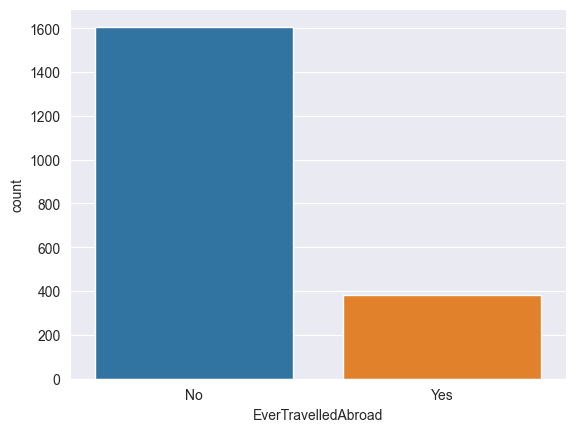

In [17]:
sns.set_style('darkgrid')
sns.countplot(x ='EverTravelledAbroad', data = data)

#### From the above plot we can clearly observe that, the Non-TravelledAbroad people are having the higher Probability of taking the Insurence.

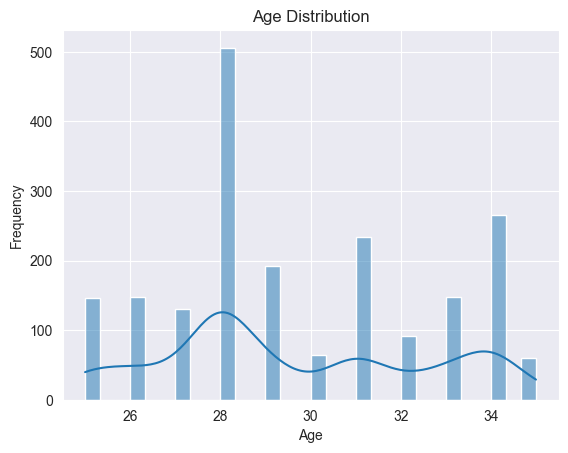

In [18]:
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### From the above plot we can clearly observe that, the people aged 28, 31, 34, 29 are having the higher Probability of taking the Insurence.

The figure layout has changed to tight


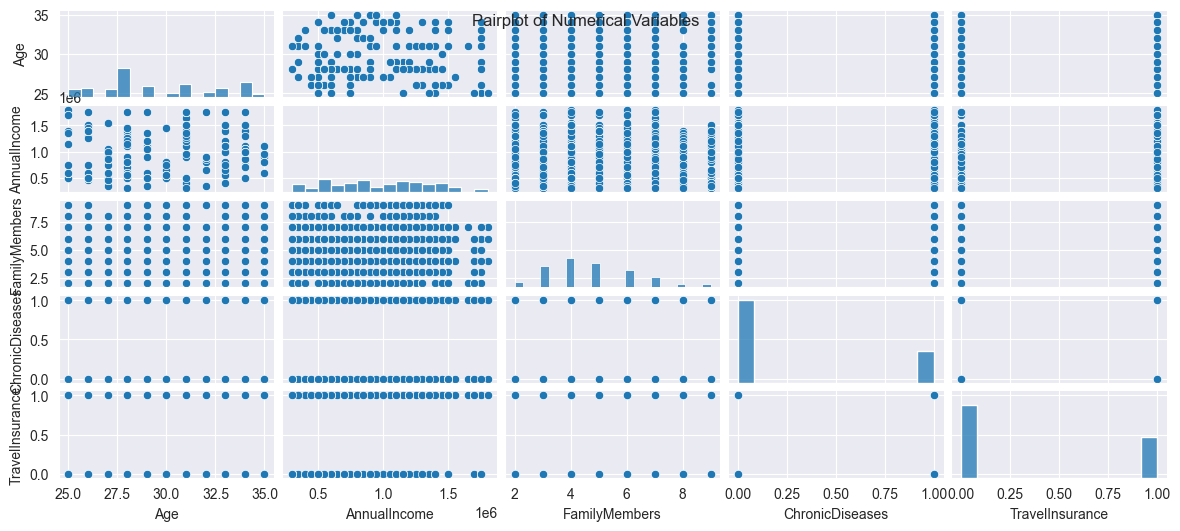

In [19]:
g = sns.pairplot(data)
g.fig.set_size_inches(12,5)
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

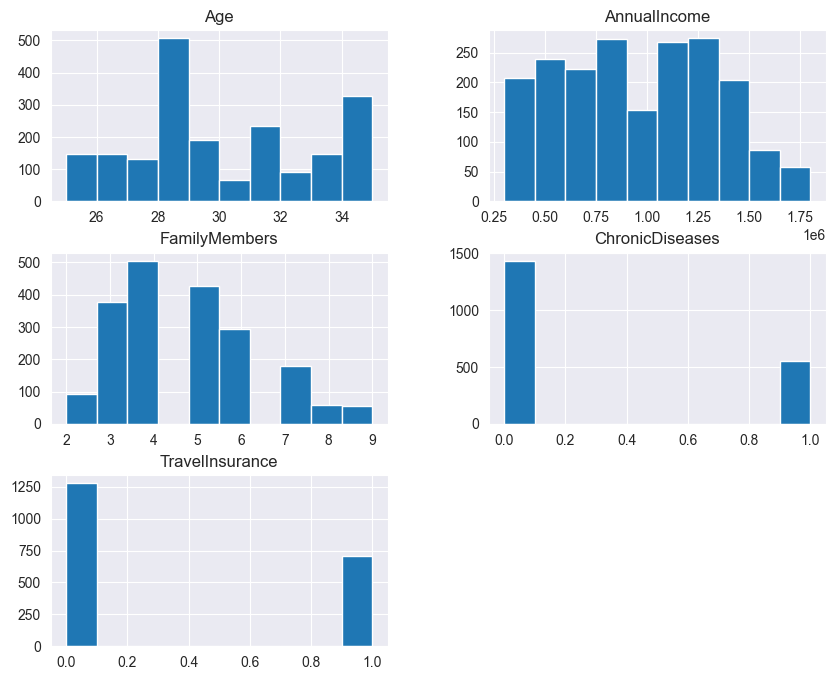

In [20]:
data.hist(figsize=(10,8)) 
plt.show() 

### Outlier Detection

<Axes: >

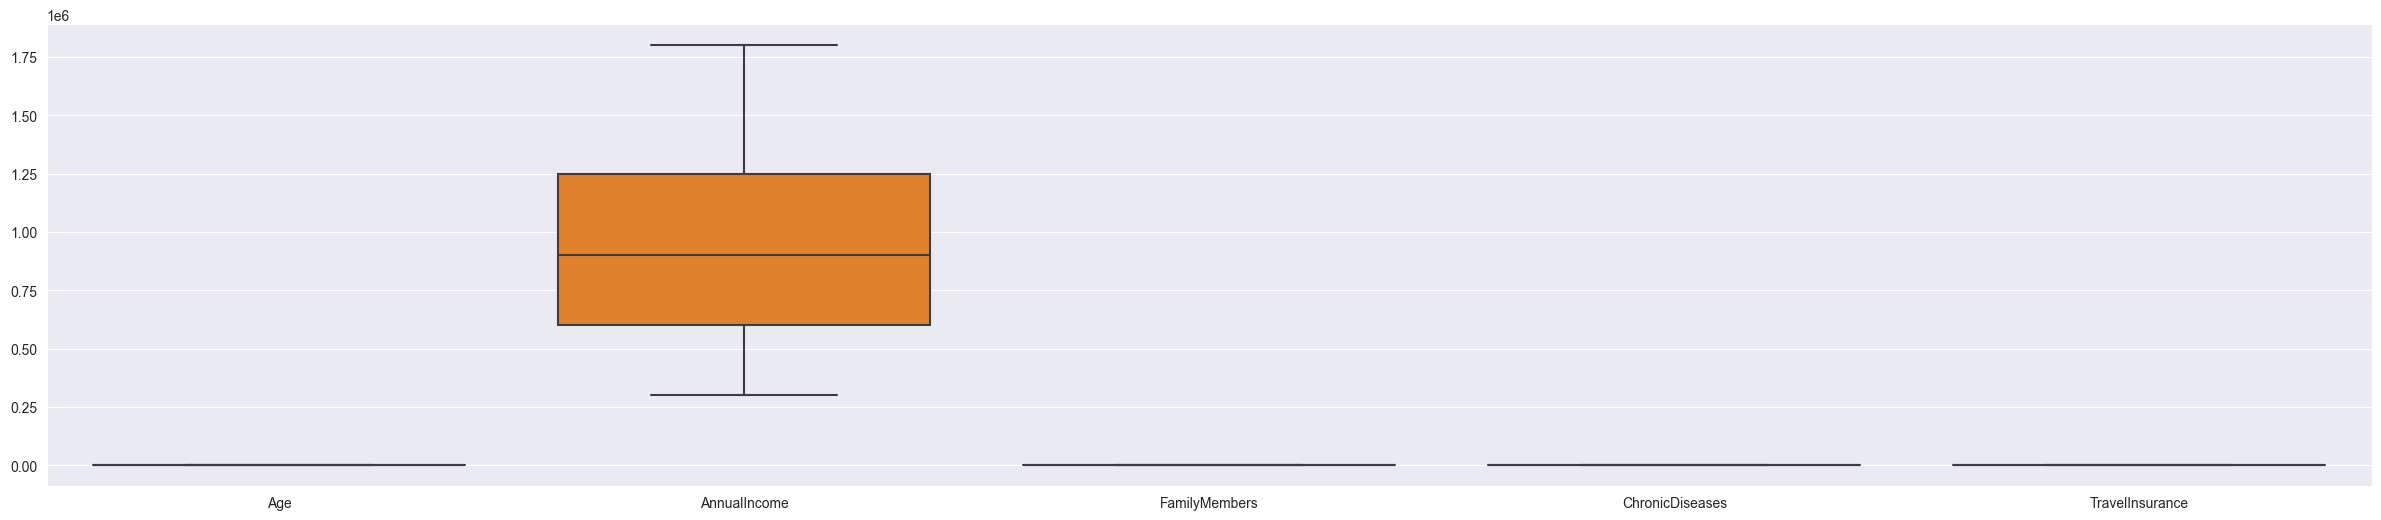

In [21]:
plt.figure(figsize=(30,6))
sns.boxplot(data)

#### There are no Outliers are present in the data set. So we need not to do any outliers tests.

### Splitting Dependent and independent Variables

In [22]:
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [23]:
x = data.drop(['TravelInsurance'], axis=1)
x.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,Government Sector,Yes,400000,6,1,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No


In [24]:
type(x)

pandas.core.frame.DataFrame

In [25]:
y = data['TravelInsurance']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TravelInsurance, dtype: int64

In [26]:
type(y)

pandas.core.series.Series

In [27]:
data.TravelInsurance.value_counts()

TravelInsurance
0    1277
1     710
Name: count, dtype: int64

### Encoding

In [28]:
x.head() 

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,Government Sector,Yes,400000,6,1,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [30]:
x["Employment Type"]=le.fit_transform(x["Employment Type"])
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

['Government Sector' 'Private Sector/Self Employed']


{'Government Sector': 0, 'Private Sector/Self Employed': 1}

In [31]:
x["GraduateOrNot"]=le.fit_transform(x["GraduateOrNot"])
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

['No' 'Yes']


{'No': 0, 'Yes': 1}

In [32]:
x["FrequentFlyer"]=le.fit_transform(x["FrequentFlyer"])
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

['No' 'Yes']


{'No': 0, 'Yes': 1}

In [33]:
x["EverTravelledAbroad"]=le.fit_transform(x["EverTravelledAbroad"])
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

['No' 'Yes']


{'No': 0, 'Yes': 1}

### Feature Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_Scaled=ms.fit_transform(x)
X_Scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)
with open("MinMaxScaler.pkl", "wb") as scaler_file:
    pickle.dump(ms,scaler_file)
X_Scaled.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0.6,0.0,1.0,0.066667,0.571429,1.0,0.0,0.0
1,0.6,1.0,1.0,0.633333,0.714286,0.0,0.0,0.0
2,0.9,1.0,1.0,0.133333,0.285714,1.0,0.0,0.0
3,0.3,1.0,1.0,0.266667,0.142857,1.0,0.0,0.0
4,0.3,1.0,1.0,0.266667,0.857143,1.0,1.0,0.0


### Splitting and Training

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size =0.3,random_state =42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1390, 8) (597, 8) (1390,) (597,)


In [36]:
x_test.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
212,0.3,1.0,1.0,0.300000,0.428571,1.0,0.0,0.0
1517,0.1,1.0,1.0,0.733333,0.285714,1.0,0.0,1.0
785,0.4,1.0,1.0,0.600000,0.714286,0.0,0.0,1.0
1175,0.8,0.0,1.0,0.066667,0.285714,1.0,0.0,0.0
1760,0.9,1.0,1.0,0.800000,0.142857,0.0,1.0,1.0


In [37]:
x_train.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
1953,0.9,0.0,1.0,0.666667,0.714286,0.0,0.0,0.0
1642,0.6,1.0,1.0,0.633333,0.714286,0.0,0.0,0.0
943,0.4,1.0,1.0,0.600000,0.428571,1.0,0.0,0.0
286,0.3,1.0,1.0,0.200000,0.142857,0.0,0.0,0.0
1593,0.1,1.0,1.0,0.133333,0.857143,0.0,0.0,0.0


In [38]:
y_train.head()

1953    1
1642    0
943     0
286     0
1593    0
Name: TravelInsurance, dtype: int64

In [39]:
y_test.head()

212     0
1517    1
785     0
1175    0
1760    1
Name: TravelInsurance, dtype: int64

### Model Building

#### 1.Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
d_pred=dtc.predict(x_test)
d_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

### Classification

In [41]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy Score = ", accuracy_score(y_test,d_pred))
print("Confusion Matrix = ", confusion_matrix(y_test,d_pred))
print("Classification Report = ")
print( classification_report(y_test,d_pred))

Accuracy Score =  0.7738693467336684
Confusion Matrix =  [[328  47]
 [ 88 134]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       375
           1       0.74      0.60      0.67       222

    accuracy                           0.77       597
   macro avg       0.76      0.74      0.75       597
weighted avg       0.77      0.77      0.77       597



In [42]:
comparison_df = pd.DataFrame({'Original_Target': y_test.values.ravel(), 'Predicted_Target': d_pred})
print(comparison_df)

     Original_Target  Predicted_Target
0                  0                 0
1                  1                 1
2                  0                 0
3                  0                 0
4                  1                 1
..               ...               ...
592                1                 0
593                1                 0
594                0                 0
595                1                 1
596                1                 1

[597 rows x 2 columns]


### 2. Logestic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
l_pred=lr.predict(x_test)
l_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

### classification

In [44]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy Score = ", accuracy_score(y_test,l_pred))
print("Confusion Matrix = ", confusion_matrix(y_test,l_pred))
print("Classification Report = ")
print( classification_report(y_test,l_pred))

Accuracy Score =  0.7487437185929648
Confusion Matrix =  [[344  31]
 [119 103]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       375
           1       0.77      0.46      0.58       222

    accuracy                           0.75       597
   macro avg       0.76      0.69      0.70       597
weighted avg       0.75      0.75      0.73       597



In [45]:
comparison_df = pd.DataFrame({'Original_Target': y_test.values.ravel(), 'Predicted_Target': l_pred})
print(comparison_df)

     Original_Target  Predicted_Target
0                  0                 0
1                  1                 1
2                  0                 1
3                  0                 0
4                  1                 1
..               ...               ...
592                1                 0
593                1                 0
594                0                 0
595                1                 1
596                1                 1

[597 rows x 2 columns]


### 3. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
r_pred = rfc.predict(x_test)
r_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

### classification

In [47]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy Score = ", accuracy_score(y_test,r_pred))
print("Confusion Matrix = ", confusion_matrix(y_test,r_pred))
print("Classification Report = ")
print( classification_report(y_test,r_pred))

Accuracy Score =  0.7922948073701842
Confusion Matrix =  [[335  40]
 [ 84 138]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       375
           1       0.78      0.62      0.69       222

    accuracy                           0.79       597
   macro avg       0.79      0.76      0.77       597
weighted avg       0.79      0.79      0.79       597



In [48]:
comparison_df = pd.DataFrame({'Original_Target': y_test.values.ravel(), 'Predicted_Target': r_pred})
print(comparison_df)

     Original_Target  Predicted_Target
0                  0                 0
1                  1                 1
2                  0                 0
3                  0                 0
4                  1                 1
..               ...               ...
592                1                 1
593                1                 0
594                0                 0
595                1                 1
596                1                 1

[597 rows x 2 columns]


### 4. KNN Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
k_pred = knn.predict(x_test)
k_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

### classification

In [50]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy Score = ", accuracy_score(y_test,k_pred))
print("Confusion Matrix = ", confusion_matrix(y_test,k_pred))
print("Classification Report = ")
print( classification_report(y_test,k_pred))

Accuracy Score =  0.7621440536013401
Confusion Matrix =  [[335  40]
 [102 120]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       375
           1       0.75      0.54      0.63       222

    accuracy                           0.76       597
   macro avg       0.76      0.72      0.73       597
weighted avg       0.76      0.76      0.75       597



In [51]:
comparison_df = pd.DataFrame({'Original_Target': y_test.values.ravel(), 'Predicted_Target': k_pred})
print(comparison_df)

     Original_Target  Predicted_Target
0                  0                 0
1                  1                 1
2                  0                 1
3                  0                 0
4                  1                 1
..               ...               ...
592                1                 1
593                1                 0
594                0                 1
595                1                 1
596                1                 1

[597 rows x 2 columns]


### 5. Gradient Boosting model

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(x_train, y_train)
g_pred = gbm.predict(x_test)
g_pred


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### classification

In [53]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy Score = ", accuracy_score(y_test,g_pred))
print("Confusion Matrix = ", confusion_matrix(y_test,g_pred))
print("Classification Report = ")
print( classification_report(y_test,g_pred))

Accuracy Score =  0.830820770519263
Confusion Matrix =  [[367   8]
 [ 93 129]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       375
           1       0.94      0.58      0.72       222

    accuracy                           0.83       597
   macro avg       0.87      0.78      0.80       597
weighted avg       0.85      0.83      0.82       597



In [54]:
comparison_df = pd.DataFrame({'Original_Target': y_test.values.ravel(), 'Predicted_Target': g_pred})
print(comparison_df)

     Original_Target  Predicted_Target
0                  0                 0
1                  1                 1
2                  0                 0
3                  0                 0
4                  1                 1
..               ...               ...
592                1                 0
593                1                 0
594                0                 0
595                1                 1
596                1                 1

[597 rows x 2 columns]


## 6. Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
n_pred = nb.predict(x_test)
n_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

### classification

In [56]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy Score = ", accuracy_score(y_test,n_pred))
print("Confusion Matrix = ", confusion_matrix(y_test,n_pred))
print("Classification Report = ")
print( classification_report(y_test,n_pred))

Accuracy Score =  0.7286432160804021
Confusion Matrix =  [[324  51]
 [111 111]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       375
           1       0.69      0.50      0.58       222

    accuracy                           0.73       597
   macro avg       0.72      0.68      0.69       597
weighted avg       0.72      0.73      0.72       597



In [57]:
comparison_df = pd.DataFrame({'Original_Target': y_test.values.ravel(), 'Predicted_Target': n_pred})
print(comparison_df)

     Original_Target  Predicted_Target
0                  0                 0
1                  1                 1
2                  0                 1
3                  0                 0
4                  1                 1
..               ...               ...
592                1                 0
593                1                 0
594                0                 0
595                1                 1
596                1                 1

[597 rows x 2 columns]


### Comparing the Models 

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (Test Set) : %.2f" % accuracy_score(y_test, y_pred))
    print("precision (Test Set) : %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set) : %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set) : %.2f" % f1_score(y_test, y_pred))

In [59]:
#Decision Tree
eval_classification(dtc)

Accuracy (Test Set) : 0.77
precision (Test Set) : 0.74
Recall (Test Set) : 0.60
F1-Score (Test Set) : 0.67


In [60]:
# Logestic Regression
eval_classification(lr)

Accuracy (Test Set) : 0.75
precision (Test Set) : 0.77
Recall (Test Set) : 0.46
F1-Score (Test Set) : 0.58


In [61]:
# Random forest
eval_classification(rfc)

Accuracy (Test Set) : 0.79
precision (Test Set) : 0.78
Recall (Test Set) : 0.62
F1-Score (Test Set) : 0.69


In [62]:
# Knn
eval_classification(knn)

Accuracy (Test Set) : 0.76
precision (Test Set) : 0.75
Recall (Test Set) : 0.54
F1-Score (Test Set) : 0.63


In [63]:
#gradient Boost
eval_classification(gbm)

Accuracy (Test Set) : 0.83
precision (Test Set) : 0.94
Recall (Test Set) : 0.58
F1-Score (Test Set) : 0.72


In [64]:
# Naive Bayes
eval_classification(nb)

Accuracy (Test Set) : 0.73
precision (Test Set) : 0.69
Recall (Test Set) : 0.50
F1-Score (Test Set) : 0.58


## From all the above, The Gradient Boost Model has the high Accuracy and Good Precision.

In [65]:
pickle.dump(gbm,open('Travel.pkl','wb'))

In [66]:
model = pickle.load(open('Travel.pkl','rb'))